In [1]:
#Los modelos de arboles se pueden clasificar en dos grupos regresion y 
#clasificacion, los de regresion la variable respuesta es cuantitativa
#y los de clasificacion la varialbe respuesta es cuantitativa


In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import export_graphviz
X_level = pd.Series([1,2,3,4,5,6,7,8,9,10])
y_salary = pd.Series([45,50,60,80,111,150,200,300,500,1000])

In [5]:
#X_level = X_level.values.reshape(-1,1)
drtm = DecisionTreeRegressor(random_state = 0)

drtm.fit(X_level, y_salary)

DecisionTreeRegressor(random_state=0)

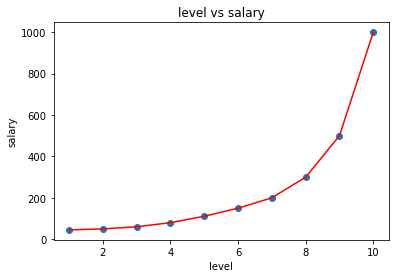

In [8]:
y_predict_salary = drtm.predict(X_level)
plt.plot(X_level, y_predict_salary, color= 'red')

plt.title('level vs salary')
plt.xlabel('level')
plt.ylabel('salary')
plt.scatter(X_level,y_salary )
plt.show()

In [12]:
export_graphviz(drtm, out_file = 'tree.dot', feature_names = ['Level'])
#se genera un documento con los valores del arbol en el espacio donde se encuentra este documento
#el contenido del .dot se puede pasar a http://webgraphviz.com/ para que genere el grafico del arbol

In [21]:
#vamos a crear un modelo de arboles de regresion con el ds de boston
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()
dsBoston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [35]:
X_features = dsBoston.data
y_prices = dsBoston.target

In [36]:
#creando datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X_features, y_prices, test_size=0.2, random_state = 42)

In [37]:
#creando modelo
dtrmBoston = DecisionTreeRegressor()
dtrmBoston.fit(x_train, y_train)

DecisionTreeRegressor()

In [38]:
y_expected = y_test
y_predicted = dtrmBoston.predict(x_test)
print('The model performance for test set')
print('----------------------------------')
print('R2 score is {}'.format(metrics.r2_score(y_expected, y_predicted)))


The model performance for test set
----------------------------------
R2 score is 0.8362510044370599


In [39]:
export_graphviz(dtrmBoston, out_file = 'treeB.dot', feature_names = dsBoston.feature_names)

In [40]:
y_predict = dtrmBoston.predict(X_features)
dfAP = pd.DataFrame({'Actual': y_prices, 'prediccion': y_predict})
dfAP.head(10)

,Actual,prediccion
0,24.0,32.5
1,21.6,21.6
2,34.7,33.0
3,33.4,33.4
4,36.2,36.2
5,28.7,28.7
6,22.9,22.9
7,27.1,27.1
8,16.5,16.5
9,18.9,20.5


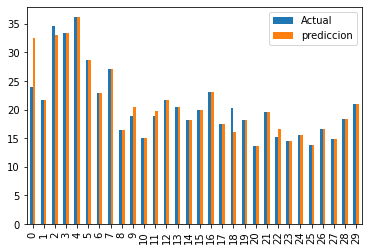

In [42]:
dfAP.head(30).plot(kind='bar')
plt.show()

In [43]:
#es un modelo muy efectivo porque tiene en cuenta todas las variables del ds Boston